# COGS 108 - Final Project: Data Analysis of the Film Industry

#### Group Members
- Josh Duhay, A12880031
- Marissa Hing, A92004487
- Sally U, A12680517
- Sally Lee, A92026847

#### Research Question
What are the most common traits of movies - type of genre, plot keywords used, social media presence - and are these common traits an indicator of financial success?

This is a question of interest because one of our group members is really passionate about the film industry. As his group members and friends, we often hear about the hundreds of movies he watches, which makes us interested in them as well. Thus, we decided to focus our final project on movies to see which attributes of a movie make them the most successful. We arrived at our hypothesis by the fact that some of us would see any movie with a certain actor/actress in it no matter what the movie is about. We also felt that movie series such as Star Wars and Harry Potter, and superhero movies such as Man of Steel and X-Men, would be the most successful because they are popularized through multiple forms of media. This question is important because if studios paid attention to these kinds of studies, then they can lower their risk of financial failure.

#### Hypothesis
After skimming the dataset, we predict that the movies that earn the most money are the ones that contain plot phrases/keywords such as "based on a comic book", "aliens", and "series" since those appear often and the box office earnings of those movies tend to be high. We also predict that a movie's success is directly related to how popular the cast is (popularity operationalized by the number of Facebook likes). However, we don't think that the genre of the movie will have an effect on the movie's success since successful movies come from all different types of genres. Overall, we believe that plot keywords have the greatest impact on financial success.

#### Import Statements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

## 1. Obtaining and cleaning data

#### Dataset(s)
Dataset Name: movie_metadata.csv

Link to the dataset: https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset

Number of observations: Over 5000 movies

This dataset contains various variables such as number of Facebook likes for the actors and movies, main actor names, box office gross, and imdb ratings, all of which are associated with a movie's popularity, talent, and success. We want to clean the data so that it only shows information relevant to our question. Rows with NaN in the gross column will be dropped since gross is the variable we are comparing every other variable to. Columns that aren't necessary like imdb ratings, budget, language, content rating, etc will also be dropped.

In [2]:
# Load in the dataset
df_movies = pd.read_csv('movie_metadata.csv')
df_movies

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [3]:
# Drop rows that have NaN in the gross column
df_movies = df_movies.dropna()

In [4]:
# Drop columns that aren't relevant to our data
df_movies = df_movies.drop('color', axis=1) # Remove color
df_movies = df_movies.drop('num_critic_for_reviews', axis=1) # Remove critic number per director
df_movies = df_movies.drop('duration', axis=1) # Remove duration
df_movies = df_movies.drop('num_voted_users', axis=1) # i don't even kno what this is
df_movies = df_movies.drop('num_user_for_reviews', axis=1) # 
df_movies = df_movies.drop('language', axis=1) # Remove language
df_movies = df_movies.drop('country', axis=1) # Remove country
df_movies = df_movies.drop('content_rating', axis=1) # Remove rating
df_movies = df_movies.drop('imdb_score', axis=1) # Remove imdb ratings
df_movies = df_movies.drop('aspect_ratio', axis=1) # Remove aspect ratio
df_movies = df_movies.drop('movie_imdb_link', axis=1) # Remove imdb link
df_movies = df_movies.drop('facenumber_in_poster', axis=1) # Remove number of faces info
df_movies = df_movies.drop('budget', axis=1) # Remove budget

In [5]:
# Reset the indices in the dataframe
df_movies = df_movies.reset_index(drop=True)
df_movies

,director_name,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,cast_total_facebook_likes,actor_3_name,plot_keywords,title_year,actor_2_facebook_likes,movie_facebook_likes
0,James Cameron,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,4834,Wes Studi,avatar|future|marine|native|paraplegic,2009.0,936.0,33000
1,Gore Verbinski,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,48350,Jack Davenport,goddess|marriage ceremony|marriage proposal|pi...,2007.0,5000.0,0
2,Sam Mendes,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,11700,Stephanie Sigman,bomb|espionage|sequel|spy|terrorist,2015.0,393.0,85000
3,Christopher Nolan,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,106759,Joseph Gordon-Levitt,deception|imprisonment|lawlessness|police offi...,2012.0,23000.0,164000
4,Andrew Stanton,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,1873,Polly Walker,alien|american civil war|male nipple|mars|prin...,2012.0,632.0,24000
5,Sam Raimi,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,46055,Kirsten Dunst,sandman|spider man|symbiote|venom|villain,2007.0,11000.0,0
6,Nathan Greno,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,2036,M.C. Gainey,17th century|based on fairy tale|disney|flower...,2010.0,553.0,29000
7,Joss Whedon,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,92000,Scarlett Johansson,artificial intelligence|based on comic book|ca...,2015.0,21000.0,118000
8,David Yates,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,Alan Rickman,Harry Potter and the Half-Blood Prince,58753,Rupert Grint,blood|book|love|potion|professor,2009.0,11000.0,10000
9,Zack Snyder,0.0,2000.0,Lauren Cohan,15000.0,330249062.0,Action|Adventure|Sci-Fi,Henry Cavill,Batman v Superman: Dawn of Justice,24450,Alan D. Purwin,based on comic book|batman|sequel to a reboot|...,2016.0,4000.0,197000


## 2. Adjusting for inflation

One factor we had to take into consideration was inflation. A movie released decades ago may not look like it made as much money at the time, but when adjusted for inflation, that number can grow if the inflation rate is positive. Similarly, a movie's gross can decrease after adjusting for inflation if the inflation rate is negative. 

The inflation rate changes every year, and since it doesn't follow any algorithmic pattern, we searched up data containing every year's inflation rates and manually inputted that data into an excel sheet to export it as a csv file to be loaded here.

The original data can be found here: http://www.multpl.com/inflation/table

The original dataframe will now have gross values adjusted for inflation.

In [6]:
# Read the inflation_rates.csv file
df_inflation = pd.read_csv('inflation_rates.csv')
df_inflation.columns = ['year', 'inflation_year']
df_inflation

,year,inflation_year
0,2017,2.50%
1,2016,1.37%
2,2015,-0.09%
3,2014,1.58%
4,2013,1.59%
5,2012,2.93%
6,2011,1.63%
7,2010,2.63%
8,2009,0.03%
9,2008,4.28%


In [7]:
# Adjust for inflation
adjustedGross = []
for i, row in df_movies.iterrows():
    year = df_movies.ix[i, 'title_year']
    gross = df_movies.ix[i, 'gross']
    for j, row in df_inflation.iterrows():
        yearToAdjust = df_inflation.ix[j, 'year']
        rate = df_inflation.ix[j, 'inflation_year']
        rate = rate.strip('%')
        rate = float(rate)
        if year == yearToAdjust:
            fixedGross = gross * rate
            newGross = gross + fixedGross
            adjustedGross.append(newGross)
            break
newGross = pd.Series(adjustedGross)
df_movies['gross'] = newGross
df_movies

,director_name,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,cast_total_facebook_likes,actor_3_name,plot_keywords,title_year,actor_2_facebook_likes,movie_facebook_likes
0,James Cameron,0.0,855.0,Joel David Moore,1000.0,7.833210e+08,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,4834,Wes Studi,avatar|future|marine|native|paraplegic,2009.0,936.0,33000
1,Gore Verbinski,563.0,1000.0,Orlando Bloom,40000.0,9.529648e+08,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,48350,Jack Davenport,goddess|marriage ceremony|marriage proposal|pi...,2007.0,5000.0,0
2,Sam Mendes,0.0,161.0,Rory Kinnear,11000.0,1.820675e+08,Action|Adventure|Thriller,Christoph Waltz,Spectre,11700,Stephanie Sigman,bomb|espionage|sequel|spy|terrorist,2015.0,393.0,85000
3,Christopher Nolan,22000.0,23000.0,Christian Bale,27000.0,1.761153e+09,Action|Thriller,Tom Hardy,The Dark Knight Rises,106759,Joseph Gordon-Levitt,deception|imprisonment|lawlessness|police offi...,2012.0,23000.0,164000
4,Andrew Stanton,475.0,530.0,Samantha Morton,640.0,2.871206e+08,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,1873,Polly Walker,alien|american civil war|male nipple|mars|prin...,2012.0,632.0,24000
5,Sam Raimi,0.0,4000.0,James Franco,24000.0,1.036513e+09,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,46055,Kirsten Dunst,sandman|spider man|symbiote|venom|villain,2007.0,11000.0,0
6,Nathan Greno,15.0,284.0,Donna Murphy,799.0,7.289304e+08,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,2036,M.C. Gainey,17th century|based on fairy tale|disney|flower...,2010.0,553.0,29000
7,Joss Whedon,0.0,19000.0,Robert Downey Jr.,26000.0,4.176824e+08,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,92000,Scarlett Johansson,artificial intelligence|based on comic book|ca...,2015.0,21000.0,118000
8,David Yates,282.0,10000.0,Daniel Radcliffe,25000.0,3.110157e+08,Adventure|Family|Fantasy|Mystery,Alan Rickman,Harry Potter and the Half-Blood Prince,58753,Rupert Grint,blood|book|love|potion|professor,2009.0,11000.0,10000
9,Zack Snyder,0.0,2000.0,Lauren Cohan,15000.0,7.826903e+08,Action|Adventure|Sci-Fi,Henry Cavill,Batman v Superman: Dawn of Justice,24450,Alan D. Purwin,based on comic book|batman|sequel to a reboot|...,2016.0,4000.0,197000


## 3. Combining data and exploratory analysis

### I. Popularity

A potential limitation to our study regarding the use of Facebook movie page likes, actor likes, and director likes as an indicator of popularity is that some older movies, actors, and directors may not be as popular now as they were back when Facebook did not exist. However, we decided to go ahead and use this variable as an indicator since nearly every popular movie, actor, and director have Facebook pages which users can still like if they are a fan of it.

In [8]:
# Add up all the actors likes for each row
total = []
for i, row in df_movies.iterrows():
    actor1likes = df_movies.ix[i, 'actor_1_facebook_likes']
    actor2likes = df_movies.ix[i, 'actor_2_facebook_likes']
    actor3likes = df_movies.ix[i, 'actor_3_facebook_likes']
    total.append(actor1likes + actor2likes + actor3likes);
totalLikes = pd.Series(total)
df_movies['total_actor_likes'] = totalLikes

In [9]:
# Add up the facebook likes of director, movie, and actors for each movie
likes = []
for i, row in df_movies.iterrows():
    actorLikes = df_movies.ix[i, 'total_actor_likes']
    directorLikes = df_movies.ix[i, 'director_facebook_likes']
    movieLikes = df_movies.ix[i, 'movie_facebook_likes']
    likes.append(actorLikes + directorLikes + movieLikes)
totalLikes = pd.Series(likes)
df_movies['total_likes_for_movie'] = totalLikes

#### Correlations between popularity and gross

In [10]:
# Create a new temp dataframe with outliers excluded
df_temp = df_movies
df_temp = df_temp[df_temp['gross'] < 300000000]
df_temp = df_temp[df_temp['gross'] > 0]

#### Combined actor popularity

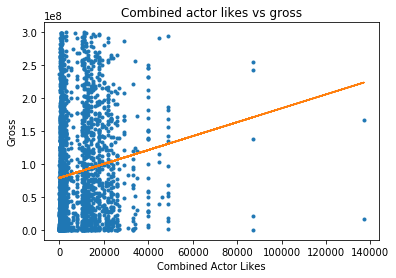

0.133803616468


In [11]:
# Correlating combined actor likes and gross

# First, remove the outliers
df_temp = df_temp[df_temp['total_actor_likes'] < 200000]

# Scatter plot of total actor likes and gross
plt.xlabel('Combined Actor Likes')
plt.ylabel('Gross')
plt.title('Combined actor likes vs gross')
x = df_temp.actor_1_facebook_likes
y = df_temp.gross
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-')
plt.show()
print(x.corr(y))

#### Individual actor popularity

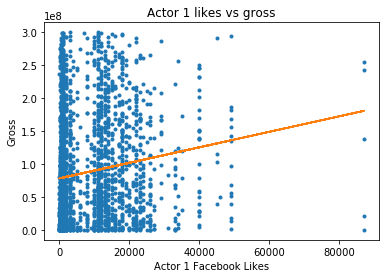

0.140995211317


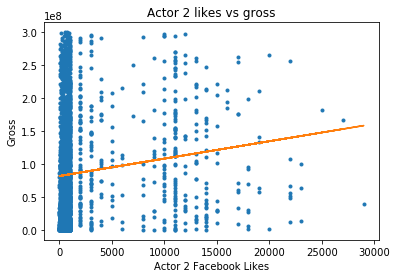

0.114396969399


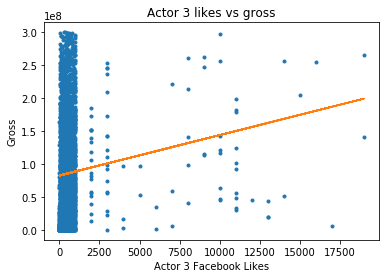

0.101716586566


In [12]:
# Correlating individual actor likes and gross

# First, remove outliers
df_temp = df_temp[df_temp['actor_1_facebook_likes'] < 100000]
df_temp = df_temp[df_temp['actor_2_facebook_likes'] < 40000]

# Scatter plot of actor 1 likes and gross
plt.xlabel('Actor 1 Facebook Likes')
plt.ylabel('Gross')
plt.title('Actor 1 likes vs gross')
x = df_temp.actor_1_facebook_likes
y = df_temp.gross
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-')
plt.show()
print(x.corr(y))

# Scatter plot of actor 2 likes and gross
plt.xlabel('Actor 2 Facebook Likes')
plt.ylabel('Gross')
plt.title('Actor 2 likes vs gross')
x = df_temp.actor_2_facebook_likes
y = df_temp.gross
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-')
plt.show()
print(x.corr(y))

# Scatter plot of actor 3 likes and gross
plt.xlabel('Actor 3 Facebook Likes')
plt.ylabel('Gross')
plt.title('Actor 3 likes vs gross')
x = df_temp.actor_3_facebook_likes
y = df_temp.gross
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-')
plt.show()
print(x.corr(y))

#### Director popularity

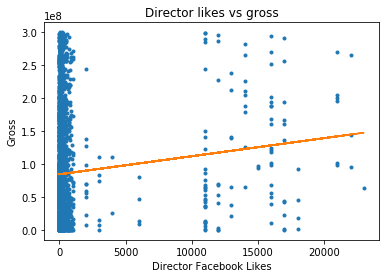

0.0905910772497


In [13]:
# Scatter plot of director likes and gross
plt.xlabel('Director Facebook Likes')
plt.ylabel('Gross')
plt.title('Director likes vs gross')
x = df_temp.director_facebook_likes
y = df_temp.gross
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-')
plt.show()
print(x.corr(y))

#### Movie popularity

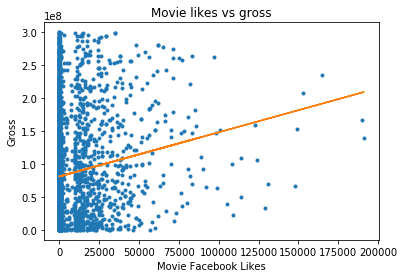

0.141529825163


In [14]:
# Correlating movie likes and gross

# First, remove outliers
df_temp = df_temp[df_temp['movie_facebook_likes'] < 200000]


# Scatter plot of movie likes and gross
plt.xlabel('Movie Facebook Likes')
plt.ylabel('Gross')
plt.title('Movie likes vs gross')

x = df_temp.movie_facebook_likes
y = df_temp.gross
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-')
plt.show()
print(x.corr(y))

#### Popularity summary

##### Correlation coefficients
Combined actor likes: 0.133803616468

Actor 1 likes: 0.140995211317

Actor 2 likes: 0.114396969399

Actor 3 likes: 0.101716586566

Director likes: 0.0905910772497

Movie likes: 0.141529825163

All variables depict a positive yet weak relationship with gross; however, the type of popularity most correlated with gross is the movie page's likes, followed by Actor 1 likes.

### II. Genre

To categorize all movies into their respective genre columns, we had to iterate through all of the movies in the original dataframe, parse through the genres pertaining to the movie, and add those genres to a genre dictionary. Afterwards, after finding all of the possible genres, we manually created lists for each genre that contained all movies within that genre. If a movie has more than one genre, then it will appear in more than one list / column.

In [15]:
# Categorize all movies into their respective genres
# Note: if a movie has more than one genre, it will be in multiple categories

# Create dictionary for genre keys
genres_dict = {}

# -- GET ALL THE GENRES --

# Iterate through all of the movies
for i in range(0, len(df_movies)):  
    
    # Get the genres pertaining to the movie
    genres = df_movies.ix[i, 'genres'].split('|')
    
    # Iterate through all movie's genres
    for j in range(0, len(genres)):
                
        # If genre doesn't already exist in genre dictionary, add it
        if genres[j] not in genres_dict:
            genres_dict[genres[j]] = []
            
genres_dict

{'Action': [],
 'Adventure': [],
 'Animation': [],
 'Biography': [],
 'Comedy': [],
 'Crime': [],
 'Documentary': [],
 'Drama': [],
 'Family': [],
 'Fantasy': [],
 'Film-Noir': [],
 'History': [],
 'Horror': [],
 'Music': [],
 'Musical': [],
 'Mystery': [],
 'Romance': [],
 'Sci-Fi': [],
 'Sport': [],
 'Thriller': [],
 'War': [],
 'Western': []}

In [16]:
# Manually create genre lists and gross lists
action = []
action_gross = []
adventure = []
adventure_gross = []
animation = []
animation_gross = []
biography = []
biography_gross = []
comedy = []
comedy_gross = []
crime = []
crime_gross = []
documentary = []
documentary_gross = []
drama = []
drama_gross = []
family = []
family_gross = []
fantasy = []
fantasy_gross = []
film_noir = []
film_noir_gross = []
history = []
history_gross = []
horror = []
horror_gross = []
music = []
music_gross = []
musical = []
musical_gross = []
mystery = []
mystery_gross = []
romance = []
romance_gross = []
sci_fi = []
sci_fi_gross = []
sport = []
sport_gross = []
thriller = []
thriller_gross = []
war = []
war_gross = []
western = []
western_gross = []

In [17]:
# Create a new dataframe from the genres dictionary, 
# then use the manually created lists to manually create a dataframe for each genre,
# then combine all of the new individual dataframes into one organized genre dataframe

df_genres = pd.DataFrame(genres_dict)

# Iterate through all of the genres
for genre in df_genres:
    
    # Iterate through all of the movies
    for i in range(0, len(df_movies)):
        
        movieTitle = df_movies.ix[i]['movie_title']
        gross = df_movies.ix[i, 'gross']
        
        # If the current genre is one of the current movie's genres
        if genre in df_movies.ix[i, 'genres'].split('|'):
            if (genre == "Action"): 
                action.append(movieTitle)
                action_gross.append(gross)
            if (genre == "Adventure"): 
                adventure.append(movieTitle)
                adventure_gross.append(gross)
            if (genre == "Animation"): 
                animation.append(movieTitle)
                animation_gross.append(gross)
            if (genre == "Biography"): 
                biography.append(movieTitle)
                biography_gross.append(gross)
            if (genre == "Comedy"): 
                comedy.append(movieTitle)
                comedy_gross.append(gross)
            if (genre == "Crime"): 
                crime.append(movieTitle)
                crime_gross.append(gross)
            if (genre == "Documentary"): 
                documentary.append(movieTitle)
                documentary_gross.append(gross)
            if (genre == "Drama"): 
                drama.append(movieTitle)
                drama_gross.append(gross)
            if (genre == "Family"): 
                family.append(movieTitle)
                family_gross.append(gross)
            if (genre == "Fantasy"): 
                fantasy.append(movieTitle)
                fantasy_gross.append(gross)
            if (genre == "Film-Noir"): 
                film_noir.append(movieTitle)
                film_noir_gross.append(gross)
            if (genre == "History"): 
                history.append(movieTitle)
                history_gross.append(gross)
            if (genre == "Horror"): 
                horror.append(movieTitle)
                horror_gross.append(gross)
            if (genre == "Music"): 
                music.append(movieTitle)
                music_gross.append(gross)
            if (genre == "Musical"): 
                musical.append(movieTitle)
                musical_gross.append(gross)
            if (genre == "Mystery"): 
                mystery.append(movieTitle)
                mystery_gross.append(gross)
            if (genre == "Romance"): 
                romance.append(movieTitle)
                romance_gross.append(gross)
            if (genre == "Sci-Fi"): 
                sci_fi.append(movieTitle)
                sci_fi_gross.append(gross)
            if (genre == "Sport"): 
                sport.append(movieTitle)
                sport_gross.append(gross)
            if (genre == "Thriller"): 
                thriller.append(movieTitle)
                thriller_gross.append(gross)
            if (genre == "War"): 
                war.append(movieTitle)
                war_gross.append(gross)
            if (genre == "Western"): 
                western.append(movieTitle)
                western_gross.append(gross)
            
df_action = pd.DataFrame({'MovieTitle': action,'Gross': action_gross})
df_adventure = pd.DataFrame({'MovieTitle': adventure,'Gross': adventure_gross})
df_animation = pd.DataFrame({'MovieTitle': animation,'Gross': animation_gross})
df_fantasy = pd.DataFrame({'MovieTitle': fantasy,'Gross': fantasy_gross})
df_sci_fi = pd.DataFrame({'MovieTitle': sci_fi,'Gross': sci_fi_gross})
df_thriller = pd.DataFrame({'MovieTitle': thriller,'Gross': thriller_gross})
df_romance = pd.DataFrame({'MovieTitle': romance,'Gross': romance_gross})
df_comedy = pd.DataFrame({'MovieTitle': comedy,'Gross': comedy_gross})
df_family = pd.DataFrame({'MovieTitle': family,'Gross': family_gross})
df_musical = pd.DataFrame({'MovieTitle': musical,'Gross': musical_gross})
df_music = pd.DataFrame({'MovieTitle': music,'Gross': music_gross})
df_mystery = pd.DataFrame({'MovieTitle': mystery,'Gross': mystery_gross})
df_western = pd.DataFrame({'MovieTitle': western,'Gross': western_gross})
df_war = pd.DataFrame({'MovieTitle': war,'Gross': war_gross})
df_drama = pd.DataFrame({'MovieTitle': drama,'Gross': drama_gross})
df_history = pd.DataFrame({'MovieTitle': history,'Gross': history_gross})
df_sport = pd.DataFrame({'MovieTitle': sport,'Gross': sport_gross})
df_crime = pd.DataFrame({'MovieTitle': crime,'Gross': crime_gross})
df_horror = pd.DataFrame({'MovieTitle': horror,'Gross': horror_gross})
df_biography = pd.DataFrame({'MovieTitle': biography,'Gross': biography_gross})
df_documentary = pd.DataFrame({'MovieTitle': documentary,'Gross': documentary_gross})
df_film_noir = pd.DataFrame({'MovieTitle': film_noir,'Gross': film_noir_gross})
df_genres = pd.concat([df_action.loc[:, 'MovieTitle'], df_adventure.loc[:, 'MovieTitle'], 
                       df_animation.loc[:, 'MovieTitle'], df_biography.loc[:, 'MovieTitle'], 
                       df_comedy.loc[:, 'MovieTitle'], df_crime.loc[:, 'MovieTitle'], 
                       df_documentary.loc[:, 'MovieTitle'], df_drama.loc[:, 'MovieTitle'], 
                       df_family.loc[:, 'MovieTitle'], df_fantasy.loc[:, 'MovieTitle'], 
                       df_film_noir.loc[:, 'MovieTitle'], df_history.loc[:, 'MovieTitle'], 
                       df_horror.loc[:, 'MovieTitle'], df_music.loc[:, 'MovieTitle'], 
                       df_musical.loc[:, 'MovieTitle'], df_mystery.loc[:, 'MovieTitle'], 
                       df_romance.loc[:, 'MovieTitle'], df_sci_fi.loc[:, 'MovieTitle'], 
                       df_sport.loc[:, 'MovieTitle'], df_thriller.loc[:, 'MovieTitle'], 
                       df_war.loc[:, 'MovieTitle'], df_western.loc[:, 'MovieTitle']], 
                       ignore_index=True, axis=1)
df_genres.columns = ['Action', 'Adventure','Animation', 'Biography', 'Comedy', 'Crime', 
                     'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 
                     'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 
                     'Thriller', 'War', 'Western']

In [18]:
df_genres

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,Avatar,Avatar,Tangled,Alexander,Tangled,Furious 7,Oceans,Robin Hood,Tangled,Avatar,...,World War Z,Home on the Range,Tangled,Harry Potter and the Half-Blood Prince,Spider-Man 3,Avatar,Cars 2,Spectre,Pearl Harbor,The Lone Ranger
1,Pirates of the Caribbean: At World's End,Pirates of the Caribbean: At World's End,Monsters University,The Aviator,Men in Black 3,Rush Hour 3,This Is It,King Kong,Harry Potter and the Half-Blood Prince,Pirates of the Caribbean: At World's End,...,The Mummy: Tomb of the Dragon Emperor,Alvin and the Chipmunks: The Road Chip,Frozen,Hugo,Tangled,John Carter,Turbo,The Dark Knight Rises,Alexander,Wild Wild West
2,Spectre,Spectre,Cars 2,Ali,Monsters University,The Dark Knight,Jackass 3D,Titanic,The Chronicles of Narnia: Prince Caspian,Tangled,...,I Am Legend,Happy Feet,Happy Feet 2,Tomorrowland,King Kong,Avengers: Age of Ultron,Speed Racer,Battleship,The Last Samurai,The Revenant
3,The Dark Knight Rises,John Carter,Toy Story 3,Public Enemies,Cars 2,The Fast and the Furious,Justin Bieber: Never Say Never,The Great Gatsby,Men in Black 3,Harry Potter and the Half-Blood Prince,...,Dark Shadows,Alvin and the Chipmunks: Chipwrecked,Rio 2,Harry Potter and the Order of the Phoenix,Titanic,Batman v Superman: Dawn of Justice,Real Steel,Jurassic World,Master and Commander: The Far Side of the World,Rango
4,John Carter,Spider-Man 3,Brave,American Gangster,Toy Story 3,Fun with Dick and Jane,Katy Perry: Part of Me,A Christmas Carol,The Golden Compass,Pirates of the Caribbean: Dead Man's Chest,...,The Wolfman,Fantasia 2000,The Princess and the Frog,Harry Potter and the Goblet of Fire,Spider-Man 2,Superman Returns,Ali,Skyfall,Australia,Home on the Range
5,Spider-Man 3,Tangled,WALL·E,The Wolf of Wall Street,Brave,Lethal Weapon 4,One Direction: This Is Us,The Legend of Tarzan,Alice in Wonderland,Man of Steel,...,End of Days,Hairspray,The Hunchback of Notre Dame,Angels & Demons,The Great Gatsby,Man of Steel,Point Break,X-Men: The Last Stand,Windtalkers,Django Unchained
6,Avengers: Age of Ultron,Avengers: Age of Ultron,A Christmas Carol,In the Heart of the Sea,Rush Hour 3,Bad Boys II,Sicko,The Dark Knight,Monsters University,The Chronicles of Narnia: Prince Caspian,...,What Lies Beneath,Dreamgirls,Mulan,Men in Black II,Prince of Persia: The Sands of Time,The Avengers,Surf's Up,Furious 7,The Patriot,The Alamo
7,Batman v Superman: Dawn of Justice,Harry Potter and the Half-Blood Prince,Up,Cinderella Man,Up,Salt,Glee: The 3D Concert Movie,Hugo,Oz the Great and Powerful,Pirates of the Caribbean: On Stranger Tides,...,The Haunted Mansion,Be Cool,Rio,Watchmen,The Legend of Tarzan,Men in Black 3,Cinderella Man,World War Z,300: Rise of an Empire,Spirit: Stallion of the Cimarron
8,Superman Returns,Batman v Superman: Dawn of Justice,Monsters vs. Aliens,A Beautiful Mind,Monsters vs. Aliens,Fast Five,Fahrenheit 9/11,Inside Out,Cars 2,Men in Black 3,...,Hollow Man,Alvin and the Chipmunks: The Squeakquel,The Nutcracker in 3D,The Bourne Ultimatum,Maleficent,Captain America: Civil War,Seabiscuit,X-Men: Days of Future Past,Kingdom of Heaven,The Legend of Zorro
9,Quantum of Solace,Superman Returns,Inside Out,Charlie Wilson's War,Wild Wild West,Sherlock Holmes: A Game of Shadows,Jackass: The Movie,The Jungle Book,Toy Story 3,The Hobbit: The Battle of the Five Armies,...,Hellboy II: The Golden Army,This Is It,Enchanted,Salt,The Curious Case of Benjamin Button,Battleship,The Longest Yard,Star Trek Beyond,Starship Troopers,Hidalgo


#### Genre frequency

Action: 959
Adventure: 781
Fantasy: 507
Sci-Fi: 496
Thriller: 1117
Romance: 859
Animation: 196
Comedy: 1461
Family: 442
Musical: 96
Mystery: 384
Western: 59
Drama: 1893
History: 149
Sport: 148
Crime: 709
Horror: 392
War: 152
Biography: 239
Music: 151
Documentary: 45
Film-Noir: 1


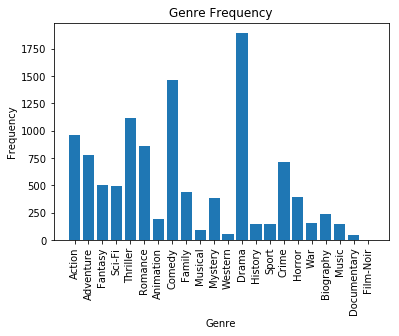

In [19]:
# Determine the frequency of each genre

# Create dictionary for genre keys
genres_dict = {}

# Iterate through all of the movies
for i in range(0, len(df_movies)):
    
    # Get each movie's genres
    genres = df_movies.ix[i, 'genres'].split('|')
    
    # Iterate through all of the movie's genres
    for j in range(0, len(genres)):
        
        # If genre doesn't already exist in genre dictionary, add it
        if genres[j] not in genres_dict:
            genres_dict[genres[j]] = 1
        
        # Increment the count if recurrence 
        else:
            genres_dict[genres[j]] += 1

for genre in genres_dict:
    print(genre + ":", genres_dict[genre])

plt.bar(range(len (genres_dict)), genres_dict.values(), align='center')
plt.xticks(range(len(genres_dict)), list(genres_dict.keys()))
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.title('Genre Frequency')
plt.show()

It appears that Drama is the most popular genre with a frequency of 1893. Other popular genres include Comedy, Thriller, and Action. 

Do these high frequencies mean that movies within these genres make more money?

In [20]:
# Find average gross for each genre
gross_dict = {}

action_avg = sum(action_gross)/len(action_gross)
gross_dict['Action'] = action_avg
adventure_avg = sum(adventure_gross)/len(adventure_gross)
gross_dict['Adventure'] = adventure_avg
animation_avg = sum(animation_gross)/len(animation_gross)
gross_dict['Animation'] = animation_avg
biography_avg = sum(biography_gross)/len(biography_gross)
gross_dict['Biography'] = biography_avg
comedy_avg = sum(comedy_gross)/len(comedy_gross)
gross_dict['Comedy'] = comedy_avg
crime_avg = sum(crime_gross)/len(crime_gross)
gross_dict['Crime'] = crime_avg
drama_avg = sum(drama_gross)/len(comedy_gross)
gross_dict['Drama'] = drama_avg
documentary_avg = sum(documentary_gross)/len(documentary_gross)
gross_dict['Documentary'] = documentary_avg
family_avg = sum(family_gross)/len(family_gross)
gross_dict['Family'] = family_avg
fantasy_avg = sum(fantasy_gross)/len(fantasy_gross)
gross_dict['Fantasy'] = fantasy_avg
film_noir_avg = sum(film_noir_gross)/len(film_noir_gross)
gross_dict['Film_Noir'] = film_noir_avg
history_avg = sum(history_gross)/len(history_gross)
gross_dict['History'] = history_avg
horror_avg = sum(horror_gross)/len(horror_gross)
gross_dict['Horror'] = horror_avg
music_avg = sum(music_gross)/len(music_gross)
gross_dict['Music'] = music_avg
musical_avg = sum(musical_gross)/len(musical_gross)
gross_dict['Musical'] = musical_avg
mystery_avg = sum(mystery_gross)/len(mystery_gross)
gross_dict['Mystery'] = mystery_avg
romance_avg = sum(romance_gross)/len(romance_gross)
gross_dict['Romance'] = romance_avg
sci_fi_avg = sum(sci_fi_gross)/len(sci_fi_gross)
gross_dict['Sci-Fi'] = sci_fi_avg
sport_avg = sum(sport_gross)/len(sport_gross)
gross_dict['Sport'] = sport_avg
thriller_avg = sum(thriller_gross)/len(thriller_gross)
gross_dict['Thriller'] = thriller_avg
war_avg = sum(war_gross)/len(war_gross)
gross_dict['War'] = war_avg
western_avg = sum(western_gross)/len(western_gross)
gross_dict['Western'] = western_avg

#### Average genre gross

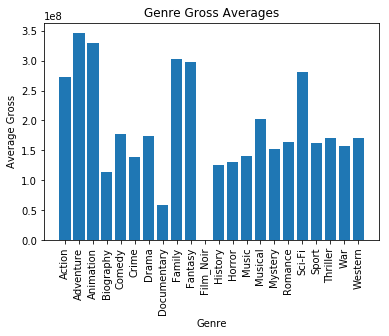

In [21]:
plt.bar(range(len (gross_dict)), gross_dict.values(), align='center')
plt.xticks(range(len(gross_dict)), list(gross_dict.keys()))
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Average Gross')
plt.title('Genre Gross Averages')
plt.show()

It appears that the genre that makes the most money on average is Adventure, followed by Animation, Family, Fantasy, Action, and Sci-Fi.

This reveals that although Drama is the most frequently reoccuring genre, it doesn't make nearly as much money on average as other genres. Other frequently reoccuring genres like Comedy and Thriller also don't make as much money on average. The only genre that has a high frequency and a high average gross is Action.

From these initial observations, it doesn't seem to be that genre has a large impact on gross.

### III. Plot keywords

The process for acquiring the plot keywords was the same as acquiring the genres - we iterated through all of the movies in the original dataframe, parsed through the plot keyword column for each movie, and added those plot keywords to a dictionary. Also, we created a dictionary for keywords and their gross values to see if the most popular plot keywords correlated with the highest average gross.

#### Plot keywords frequency

alien: 72
love: 147
revenge: 53
prison: 53
friend: 133
death: 102
boy: 63
school: 58
new york city: 74
murder: 131
drugs: 52
money: 51
police: 89
fbi: 65
friendship: 51
high school: 71


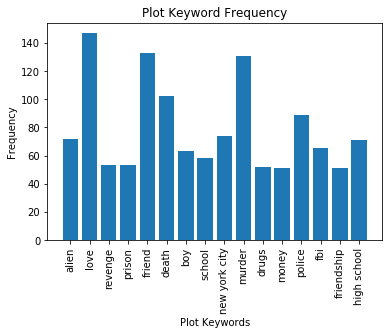

In [22]:
# Find the most frequent recurring words (around 10-30) in each movie's plot keywords column

# Create dictionary for plot keyword keys
keywords_dict = {}
gross_keyword_dict = {}

# Iterate through all of the movies
for i in range(0, len(df_movies)):  
    
    # Get each movie's plot keywords
    keywords = df_movies.ix[i, 'plot_keywords'].split('|')
    gross = df_movies.ix[i, 'gross']
    
    # Iterate through all of the movie's keywords
    for j in range(0, len(keywords)):
                
        # If genre doesn't already exist in genre dictionary, add it
        if keywords[j] not in keywords_dict:
            keywords_dict[keywords[j]] = 1
            gross_keyword_dict[keywords[j]] = []
            gross_keyword_dict[keywords[j]].append(gross)
            
        # Increment the count if recurrence 
        else:
            keywords_dict[keywords[j]] += 1
            gross_keyword_dict[keywords[j]].append(gross)

# Find the keywords that reoccur over 50 times
numKeywords = 0
freq_words = {}
for keyword in keywords_dict:
    if keywords_dict[keyword] > 50:
        print(keyword + ":", keywords_dict[keyword])
        freq_words[keyword] = keywords_dict[keyword]
        numKeywords += 1
        
# Find the most common keyword
for keyword in keywords_dict:
    if keywords_dict[keyword] == max(keywords_dict.values()):
        mostPopularKeyword = keyword
        
plt.bar(range(len(freq_words)), freq_words.values(), align='center')
plt.xticks(range(len(freq_words)), list(freq_words.keys()))
plt.xticks(rotation=90)
plt.xlabel('Plot Keywords')
plt.ylabel('Frequency')
plt.title('Plot Keyword Frequency')
plt.show()

There are 16 keywords with a frequency greater than 50.
The most popular keyword is love with a frequency of 147, followed by murder, friend, and death.

Do movies featuring these plot keywords make the most money compared to movies that don't feature these keywords? 

Is there another keyword that doesn't appear very often but makes more money?

### Average gross for movies containing plot keywords

We are only plotting the top 20 plot keywords which have the highest average grosses.

In [23]:
# Find the average gross for all movies that contain specific plot keywords
df_keywords = pd.DataFrame.from_dict(gross_keyword_dict, orient='index')
df_keywords

,0,1,2,3,4,5,6,7,8,9,...,137,138,139,140,141,142,143,144,145,146
avatar,7.833210e+08,4.775800e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
future,7.833210e+08,1.290796e+08,3.353356e+08,5.412607e+08,8.165615e+07,5.013351e+08,2.654352e+08,1.596912e+08,2.825102e+08,1.362208e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marine,7.833210e+08,2.197429e+08,1.304167e+08,8.890246e+07,9.402814e+07,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
native,7.833210e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
paraplegic,7.833210e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
goddess,9.529648e+08,9.463795e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marriage ceremony,9.529648e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marriage proposal,9.529648e+08,7.476000e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pirate,9.529648e+08,6.339980e+08,1.099399e+09,8.157799e+07,6.339775e+08,4.180000e+07,1.478712e+08,1.181038e+08,1.220309e+08,3.349695e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
singapore,9.529648e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


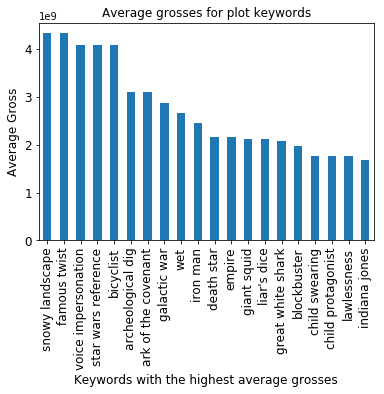

In [24]:
# Find average gross of movies with top keywords
df_keywords['mean'] = df_keywords.mean(axis=1)
df_keywords = df_keywords.sort_values('mean', ascending=False).head(20)
df_keywords = df_keywords['mean']
ax = df_keywords.plot(kind='bar', title ="keyword gross", fontsize=12)
ax.set_xlabel("Keywords with the highest average grosses", fontsize=12)
ax.set_ylabel("Average Gross", fontsize=12)
ax.set_title("Average grosses for plot keywords")
plt.show()

WOW! We were way off in our predictions! Who knew that 'snowy landscape' would be the plot keyword associated with the highest average grossing movies?

After observing the dataset, we noticed that there is only 1 movie with that obscure plot keyword - Star Wars Episode V: The Empire Strikes Back - a movie with a really high gross on its own. Without being weighed down by other movies containing the same plot keyword, this ended up being the plot keyword with the highest average gross for all movies that contain it.

The number of movies containing the plot keyword is likely to lower the average gross for all movies containing that plot keyword. For example, the plot keyword love is associated with 147 movies, many of which could have been financial flops.

We conclude that plot keywords do not determine financial success. 

## 5. Discussion

#### Research question and hypothesis revisited
From our observations, it turns out that the type of genre and plot keywords used have no major effect on movie gross, but we were able to see that there is a small correlation between social media presence and gross that indicates that social media presence has a slight effect on financial success. However, we were able to discover interesting data related to our question. For example, we learned that drama is the most common genre with the highest number of movies belonging to the genre; however, is commonality the same as popularity? If we measure popularity as an indicator of financial success, then it turns out that despite there being a majority of movies classified as drama, it does not make drama the most popular in terms of gross, and several other genres followed this pattern.

Although the correlations were extremely small, we were correct in predicting that the number of Facebook likes has a minor positive relationship with a movie's financial success. Also, we were correct in believing that the genre of the movie will not have a drastic effect on the movie's success since successful movies come from all different types of genres and more popular genres may have their averages weighed down by a few financial flops.

We were wrong, however, to believe that plot keywords have the greatest impact on financial success. Our test didn't dive too deep into plot keywords and their correlation with gross, but we did uncover that the more popular a keyword is, the more its average gross is to be weighed down by a few financial flops similarly to genre.

#### Potential confounds and limitations
Some potential limitations of this dataset would be that it mainly observes popular movies and ignores smaller budget independent films. This scarcity of data might have caused our experiment to provide results applicable only to higher budget studio films, and this exclusivity would not represent the film industry as a whole.

Another issue we have to take into consideration is the year each film was released. Movies that were released in the early 2000s and before may have inaccurate social media data since Facebook was not yet popular or not even invented at the time of their release. However, those movies would still have pages created for them yet that wouldn't be completely accurate if the movie is not as popular now as it was back in the day. All we could do was go with it.

Another issue we had was with the inflation since the inflation rate data we extracted varied across websites and datasets.

#### Improvements and possible extensions
For further study, we could discover a way to actually correlate genre and plot keyword commonality with gross to get more in depth results rather than just comparing bar graphs and averages within these variables. We couldn't devise an algorithm that was able to accomplish this, so we were limited in our analyses.

We also tried to create statistical tests to arrive at more accurate conclusions, but it was difficult to test our variables since a movie can have multiple genres and multiple plot keywords. It just doesn't make sense to correlate gross with something that totals up the number of movies that contain a plot keyword or belongs to a specific genre because those variables are not exclusively unique to that movie, so how would it correlate with gross? We were also dealing with both quantitative and qualtitative data, so we couldn't discover relationships between the two categories of data.

We could have also made a word cloud for fun as another way to visualize variable frequencies.

#### References
- 1) http://www.people.hbs.edu/aelberse/papers/hbs_06-002.pdf 

Elberse, Anita. "The power of stars: Do star actors drive the success of movies?." Journal of Marketing 71.4 (2007): 102-120.

This article asks and answers the question "Do star actors drive the success of movies?" Tom Cruise, Brad Pitt, Angelina Jolie, and Tom Hanks are all huge names in the industry whose movies have earned themselves millions of dollars. However, there are also movies that have made millions that had no stars in it at the time such as Star Wars, ET, and Titanic. In the end, after multiple experiments and data mining, the author found that there was a positive relationship between movie success and star actors. This relates to our project because we will be using attributes of movies such as the actors to see which movies are the most successful; however, we won't be looking at the salary of the individual to justify their popularity; instead we will be looking at their amount of Facebook likes.


- 2) https://cloudtweaks.com/2014/02/big-data-changing-film-industry/ 

This article discusses how big data is changing the film industry by taking into account consumer preferences, viewing habits, and cultural habits. It also provides a research article that explores the nature of social media and its role in marketing, specifically how Facebook likes are a direct indicator of a movie's likelihood of selling out on its opening weekend. This relates to our project because we will be using variables like Facebook likes to determine a film's potential.